In [179]:

## Notes on Practical Aspects of Deep Learning (week 2 of course 2 in deep learning specialisation)

### The below implements: mini-batch training, Adam Optimiser, learning rate decay


## Aiming to predict whether a plant is species setosa or not

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

In [78]:
# suggests for train set of 5 million, mini batch size of 1000 isnt unreasonable

# think minibatch works because full dataset isn't needed to update weights well
# so can train faster without sacrificing performance

# may also prevent overfitting, not sure

# 1 epoch = going through all mini-batch sets, where each train data gets put through gradient descent once

# for mini-batch cost decrease over training rounds may not be monotonic. But should trend downwards

# stochastic gradient descent = when mini-batch sample size is 1 (lose all your benefits of vectorised compute tho)

# can probably figure out optimal mini-batch size which harnesses speed gains from vectors while
# not taking too long to process each iteration



##### rules of thumb on mini batch size:
# if data under 2000 samples, just use whole batch 
# typical sizes are 64, 128, 256, 512, 1024


# can also test different batch sizes by treating it as a hyperparameter to optimise


In [141]:
# exponentially weighted average = weighted average, with (beta) weight to previous data and 
# (1-beta) weight to current

# for values of beta closer to 1, can take a few iterations before your averages "warm up" (ie, are 
# doing true moving averages based on enough days/iters of past data)
# This isnt a problem if using it for gradient descent momentum

# in practice, values propagate over about 1 / (1 - Beta) iterations/days/whatever, 
# to be precise, for something 1 / (1 - Beta) iters in the past, it's weight will be 1/e that of the most recent
# (about 37%):
print(1/np.exp(1))

def exp_weighted_avg_single(current_val, previous_val, beta):
    return (beta * previous_val) + (current_val * (1 - beta))

def exp_weighted_avg_vector(input_array, beta):
    """
    Seems to only work as expected for some values of beta (values close to 1 should mean less similar to most recent
    value)
    """
    
    output = [input_array[0]]
    for i in range(1, input_array.shape[0]):
        
        current_val = input_array[i]
        previous_val = input_array[i-1]
        output.append(exp_weighted_avg_single(current_val, previous_val, beta))
        
    return output

input_random_seq = np.random.randn(20)
smooth_random_seq = exp_weighted_avg_vector(input_random_seq, 0.4)

0.36787944117144233


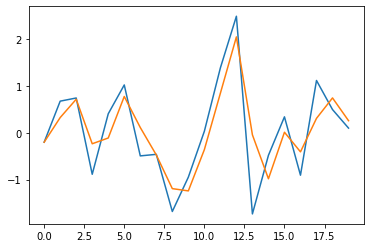

In [142]:
# exponential smoothing results
plt.plot(input_random_seq)
plt.plot(smooth_random_seq)
plt.show()

In [143]:
### gradient descent with momentum
# compute exponential average of the gradient (giving momentum), and use this to update weights
# for each layer, take previous dW and dB values, alongside current dW and dB, and put
# through exponential smoothing with a given beta value, to decide this it's dW and dB


# momentum works with minibatch: do it all the same as usual 
# if mini-batching with momentum, maybe makes since to have larger batch sizes, as more occuring at 
# each iteration (not sure)


# could imagine a modification allowing the gradient to take larger steps (using some multiplier)
# where the difference in momentum between the previous X iters is below a certain threshold,
# signalling that it's safe to go faster in that direction


# beta is a hyperparam that can be searched for
# beta=0.9 is most common



In [148]:
### RMSprop = root mean square prop
# aim is speed momentum in some dimensions and slow it in others, to get to global minimum faster
# 
# Process:
# get dW and dB in current mini-batch
# S_dw = S_dw(previous)  + (1-beta)*d_W^2 
# S_db = S_db(previous)  + (1-beta)*d_b^2 

# I *think* (not sure) initial S_dw and S_db values can be set to zero, and after <100 iterations
# they will be 'burned in' (my term), which is few enough not to affect the NN performance, as it
# trains over many more iterations than that

# then when updating weights:
# w = w  - (lr * dw) / np.sqrt(s_dw + epsilon)   
# b = b  - (lr * db) / np.sqrt(s_db + epsilon)
# epsilon = small number (maybe 10^-8) to ensure the denominator can't be exactly zero

# says the damping effect of RMSprop for undesirable directions can make it safer to use a larger learning rate

# learns faster when s_dw is smaller
# s_dw is proportional to d_W^2, so learns faster when d_W is smaller
# says d_W tends to be smaller when it's the right direction. 
# Not sure what makes this so: think there's an intuition I'm not getting
# 


# Formulae are similar to momentum 



# for formulae:
# https://www.coursera.org/learn/deep-neural-network/lecture/BhJlm/rmsprop

In [149]:
#### Adam optimisation combines momentum and RMSProp
## says Adam is a rare optimisation algo that tends to work well across NN architectures

# initialise values to zero (course tells you to do this, so assume it's acceptable):
# v_dw = 0
# s_dw = 0
# v_db = 0
# s_db = 0

# two beta params: beta and beta2

### on a given iteration:
# v_dw = beta * v_dw[previous] + (1-beta) * dw    # same formula as momentum
# v_db = beta * v_db[previous] + (1-beta) * db

# s_dw = beta2 * d_dw[previous] + (1-beta2) * dw^2   # same formula as RMSprop
# s_db = beta2 * d_db[previous] + (1-beta2) * db^2

 # 'bias correcting' v_dw and others, where t = total iterations so far
# v_dw = v_dw / (1 - beta^t)  
# v_db = v_db / (1 - beta^t)  
# s_dw = s_dw / (1 - beta2^t)
# s_db = s_db / (1 - beta2^t)

# applying to weights
#w = w - (lr * v_dw) / np.sqrt(s_dw * epsilon)
#b = b - (lr * v_db) / np.sqrt(s_db * epsilon)



### hyperparams to choose:
# learning rate = no clear default
# beta = 0.9 default value
# beta2 = 0.999 default value
# epsilon. 10^8 is generally fine - people tend not to search for it
# 



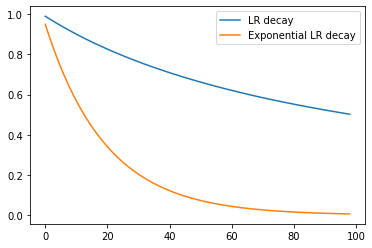

In [230]:
# learning rate decay = decreasing learning rate as iterations progress
# 

def learning_rate_decay(lr_init, decay_rate, epoch_number):
    return lr_init / (1 + decay_rate * epoch_number)


def exponential_learning_rate_decay(lr_init, epoch_number):
    """Another method of decaying the learning rate
    Less flexible"""
    return np.power(0.95, epoch_number) * lr_init


plt.plot(learning_rate_decay(1, 0.01, np.arange(1, 100, 1)))
plt.plot(exponential_learning_rate_decay(1, np.arange(1, 100, 1)))
plt.legend(['LR decay', 'Exponential LR decay'], loc='upper right')
plt.show()



In [164]:
## some regularisation components you can add
# lambda becomes another hyperparameter to tune in your model


def l2_regularisation(lambda_val, m, w):
    """aka 'L2 norm' or 'Euclidean norm' or 'weight decay' (as causes weights to get smaller)
    
    Much more popular than L1 regularisation
    """
    return lambda_val * np.power(np.sum(w), 2) / (m * 2)

## (if using L-2 regularisation update cost function too)




### this bit by itself is called the Frobenius Norm:
# np.power(np.sum(w), 2)


def l1_regularisation(lambda_val, m, w):
    """ aka L1 norm"""
    return (lambda_val * np.sum(np.absolute(w))) / m




## to include l2_regularisation during backpropagation we add a term:
# dW[L] = (what it would be normally) + (lambda / m)*W[L]   
## where new term is the derivative of l2_regularisation func with respect to W




array([-0.04002973, -1.43711267,  0.27778187, -0.62621999, -0.36223335,
       -0.72489854])

In [165]:
### Activation functions:
# denote generic activation function as g(x)

# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sigmoid_output):
    return sigmoid_output * (1- sigmoid_output)   # * = element-wise mult; @ = matrix mult


# ReLu: better for larger values as the gradient doesn't become close to 0, which it does for tanh and sigmoid
# ReLu trains faster because of this 
def relu(x):
    return np.where(x >= 0, x, 0)

def relu_derivative(x):       
    """note x is the original input to relu, not the output from relu, unlike other
    derivatives of activation functions"""
    return np.where(x >= 0, 1, 0)




150 5
(150, 5)


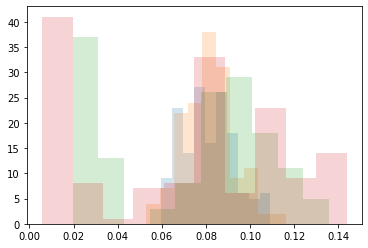

In [166]:
# load data
data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
data = data.to_numpy()


# unique, counts = np.unique(data[:, 4], return_counts=True)
setosa_idx = data[:, 4] == 'setosa'  # simplify species column to binary
data[:, 4] = 1   # not setosa
data[setosa_idx, 4] = 0   # setosa


idx = np.random.rand(*data.shape).argsort(axis=0) # randomising order for test/train split
data = np.take_along_axis(data,idx,axis=0)


# normalise first 4 columns
for i in range(4): 
    norms_each_column = np.linalg.norm(data[:, i], axis = 0)
    data[:, i] = data[:, i] / norms_each_column

    
    
print(*data.shape)  # return values outside tuple
print(data.shape)


# distribution of values for each column shows they are operating on the same scale with similar distributions
plt.hist(data[:, 0], alpha = 0.2)
plt.hist(data[:, 1], alpha = 0.2)
plt.hist(data[:, 2], alpha = 0.2)
plt.hist(data[:, 3], alpha = 0.2)
plt.show()

In [167]:
train_input = data[:120, :4].T   # transpose to row for each feature and column for each value: faster calcs
train_labs = data[:120, 4:].T

test_input = data[120:, :4].T
test_labs = data[120:, 4:].T

print(train_input.shape)
print(train_labs.shape)

(4, 120)
(1, 120)


In [291]:
def feedforward_relu_layer(X, W, B):
    """
    X = input data 
    W = input weights
    B = input bias
    
    Exports Z as it's needed for backpropagation
    """
    Z = np.dot(W, X) + B
    return relu(Z), Z  # returns 2 n * m arrays  (n = number of neurons)


def backpropagate_relu_layer(X, Z, dZ_nextLayer, W_nextLayer):
    """
    X = input at start of the layer (from input layer or previous hidden layer)
    Z = values after X been through linear calculation (yx + b)
    dZ_nextLayer = dZ from layer next-closest to output layer
    W_nextLayer = W from layer next-closest to output layer
    """
    m = X.shape[1]                                 # total input data in training set
    dZ_thisLayer = (W_nextLayer.T @ dZ_nextLayer) * relu_derivative(Z)  
    dW_this_layer = (1/m) * (dZ_thisLayer @ X.T)
    dB_this_layer = (1/m) * np.sum(dZ_thisLayer, axis=1, keepdims=True)
    return dZ_thisLayer, dW_this_layer, dB_this_layer

In [169]:
def cost_function(y, y_hat):   
    """Logistic regression cost function
    y = actual
    y_hat = predicted
    """
    m = y.shape[1]  # total predictions made
    lhs = np.dot(y, np.log(y_hat).T) # returns 1x1 array
    rhs = np.dot((1 - y), np.log(1 - y_hat).T)
    total_loss = np.sum(lhs + rhs)
    return -total_loss / m

In [324]:
def update_adam_parameters(v_dw, v_db, s_dw, s_db, dW, dB, beta1, beta2):
    v_dw_new = beta1 * v_dw + (1-beta1) * dW    # same formula as momentum
    v_db_new = beta1 * v_db + (1-beta1) * dB
    s_dw_new = beta2 * s_dw + (1-beta2) * np.power(dW, 2)   # same formula as RMSprop
    s_db_new = beta2 * s_db + (1-beta2) * np.power(dB, 2)
        
    v_dw_new = v_dw_new.astype(float)
    v_db_new = v_db_new.astype(float)
    s_dw_new = s_dw_new.astype(float)
    s_db_new = s_db_new.astype(float)
    return v_dw_new, v_db_new, s_dw_new, s_db_new

In [284]:
x = np.random.randn(4, 4) + 2
np.sqrt(x)
type(x)

numpy.ndarray

In [319]:
def gradient_descent(X, Y, n_layer, lr_init, iterations, decay_rate, beta1=0.9, beta2=0.999):
    """
    Trains parameters for NN with 3 hidden layers, and output layer with sigmoid activation
    
    X = input table (n * m)
    Y = labels    (1 * m)
    lr = Learning rate: how much weights change on each iteration
   """
    
    loss_store = np.zeros(iterations)  # to store loss on each iteration
    
    epsilon = 10**-8  # used in Adam optimiser
    
    
    # set dimension values used 
    n_0 = X.shape[0]   # total features 
    n_1 = n_layer         # number of neurons in hidden layer
    n_2 = 1         # output units: think it's 1 as only one layer. Could be 2 if linked to binary outcome somehow
    

    m = X.shape[1]   # size of input data
    
    # initialise weights             
    W_1_1 = np.random.randn(n_1, n_0) * np.sqrt(2 / n_0)  # notice weights in first layer have different dims
    W_1_2 = np.random.randn(n_1, n_1) * np.sqrt(2 / n_1) 
    W_1_3 = np.random.randn(n_1, n_1) * np.sqrt(2 / n_1) 
    B_1_1 = np.random.randn(n_1, 1) * np.sqrt(2 / n_1) 
    B_1_2 = np.random.randn(n_1, 1) * np.sqrt(2 / n_1) 
    B_1_3 = np.random.randn(n_1, 1) * np.sqrt(2 / n_1) 
    
    W_2 = np.random.randn(n_2, n_1) * np.sqrt(2 / n_1) 
    B_2 = np.random.randn(n_2, 1) * np.sqrt(2 / n_1) 

    
    # group training data for mini-batch
    mini_batch_groups = np.split(X, 6, axis = 1)
    mini_batch_group_labels = np.split(Y, 6, axis = 1)
    
    
    # initialise values for Adam optimiser
    v_dw_1_1 = 0.0
    s_dw_1_1 = 0.0
    v_db_1_1 = 0.0
    s_db_1_1 = 0.0
    
    v_dw_1_2 = 0.0
    s_dw_1_2 = 0.0
    v_db_1_2 = 0.0
    s_db_1_2 = 0.0
    
    v_dw_1_3 = 0.0
    s_dw_1_3 = 0.0
    v_db_1_3 = 0.0
    s_db_1_3 = 0.0
    
    v_dw_2 = 0.0
    s_dw_2 = 0.0
    v_db_2 = 0.0
    s_db_2 = 0.0


    
    #### starting gradient descent loop
    start_time = time.time()
    epoch_number = 1
    for i in range(iterations):
        
        
        # selecting mini batch data for this iter
        group_selected = np.mod(i, 6)
        X = mini_batch_groups[group_selected]
        Y = mini_batch_group_labels[group_selected]
        if group_selected == 0:
            epoch_number += 1
            #print('end of epoch ' + str(i / 6))
        
        
        
        # hidden layer: compute linear transformation of inputs
        A_1_1, Z_1_1 = feedforward_relu_layer(X, W_1_1, B_1_1)
        A_1_2, Z_1_2 = feedforward_relu_layer(A_1_1, W_1_2, B_1_2)
        A_1_3, Z_1_3 = feedforward_relu_layer(A_1_2, W_1_3, B_1_3)


        # output layer: linear transformation and activation func
        Z_2 = np.dot(W_2, A_1_3) + B_2
        Z_2 = Z_2.astype(np.float) # ensure is float; needed for sigmoid() to work
        A_2 = sigmoid(Z_2)

        
        # store cost
        loss_store[i] = cost_function(Y, A_2)


        # output layer: get derivatives
        dZ_2 = A_2 - Y                           
        dW_2 = (1/m) * (dZ_2 @ A_1_3.T)
        dB_2 = (1/m) * np.sum(dZ_2, axis=1, keepdims=True)  # sums horizontally


        # hidden layers: get derivatives 
        dZ_1_3, dW_1_3, dB_1_3 = backpropagate_relu_layer(A_1_2, Z_1_3, dZ_2, W_2)
        dZ_1_2, dW_1_2, dB_1_2 = backpropagate_relu_layer(A_1_1, Z_1_2, dZ_1_3, W_1_3)
        dZ_1_1, dW_1_1, dB_1_1 = backpropagate_relu_layer(X, Z_1_1, dZ_1_2, W_1_2)

        
        # calculate decaying learning rate
        lr = learning_rate_decay(lr_init, decay_rate, epoch_number)
        
        
        # Updating Adam opimiser parameters
        v_dw_1_1,v_db_1_1,s_dw_1_1, s_db_1_1 = update_adam_parameters(v_dw_1_1, v_db_1_1, s_dw_1_1, s_db_1_1, dW_1_1, dB_1_1, beta1, beta2)
        v_dw_1_2,v_db_1_2,s_dw_1_2, s_db_1_2 = update_adam_parameters(v_dw_1_2, v_db_1_2, s_dw_1_2, s_db_1_2, dW_1_2, dB_1_2, beta1, beta2)
        v_dw_1_3,v_db_1_3,s_dw_1_3, s_db_1_3 = update_adam_parameters(v_dw_1_3, v_db_1_3, s_dw_1_3, s_db_1_3, dW_1_3, dB_1_3, beta1, beta2)
        v_dw_2,v_db_2,s_dw_2, s_db_2 = update_adam_parameters(v_dw_2, v_db_2, s_dw_2, s_db_2, dW_2, dB_2, beta1, beta2)

                                                                
         # leaving out 'bias correcting' v_dw and others, where t = total iterations so far
        # v_dw = v_dw / (1 - beta^t)  
        # v_db = v_db / (1 - beta^t)  
        # s_dw = s_dw / (1 - beta2^t)
        # s_db = s_db / (1 - beta2^t)

        

        # update weights
        """
        print('s_dw_1_1: ' + str(s_dw_1_1))
        print('epsilon: ' + str(epsilon))
        print('epsilon: ' + str(epsilon + s_dw_1_1))
        print('np.sqrt(s_dw_1_1 + epsilon)')
        print(type(s_dw_1_1))
        print((s_dw_1_1.shape))
        """
        """
        print('B_1_1 dim earlier: ' + str(B_1_1.shape))
        print('v_db_1_1 dim earlier: ' + str(v_db_1_1.shape))
        print('s_db_1_1 dim earlier: ' + str(s_db_1_1.shape))
        """
        
        W_1_1 = W_1_1 - (lr * v_dw_1_1) / np.sqrt(s_dw_1_1 + epsilon)
        B_1_1 = B_1_1 - (lr * v_db_1_1) / np.sqrt(s_db_1_1 + epsilon)
        
        W_1_2 = W_1_2 - (lr * v_dw_1_2) / np.sqrt(s_dw_1_2 + epsilon)
        B_1_2 = B_1_2 - (lr * v_db_1_2) / np.sqrt(s_db_1_2 + epsilon)
        
        W_1_3 = W_1_3 - (lr * v_dw_1_3) / np.sqrt(s_dw_1_3 + epsilon)
        B_1_3 = B_1_3 - (lr * v_db_1_3) / np.sqrt(s_db_1_3 + epsilon)
        
        W_2 = W_2 - (lr * v_dw_2) / np.sqrt(s_dw_2 + epsilon)
        B_2 = B_2 - (lr * v_db_2) / np.sqrt(s_db_2 + epsilon)
                
        if (np.mod(i, 1000) == 0):
            print('iteration done: ' + str(i))

            """
        W_1_1 = W_1_1 - lr * dW_1_1
        W_1_2 = W_1_2 - lr * dW_1_2
        W_1_3 = W_1_3 - lr * dW_1_3
        B_1_1 = B_1_1 - lr * dB_1_1
        B_1_2 = B_1_2 - lr * dB_1_2
        B_1_3 = B_1_3 - lr * dB_1_3
        W_2 = W_2 - lr * dW_2
        B_2 = B_2 - lr * dB_2
        """
        
    
    avg_iter_time = (time.time() - start_time) / iterations

    return W_1_1, W_1_2, W_1_3, B_1_1,B_1_2, B_1_3, W_2, B_2, loss_store, avg_iter_time

    


In [334]:
## training model weights. n_layer represents the number of nodes in each layer
W_1_1, W_1_2, W_1_3, B_1_1,B_1_2, B_1_3, W_2, B_2, loss_store, avg_iter_time = gradient_descent(train_input, 
                                                                                                train_labs, 
                                                                                                n_layer = 10, 
                                                                                                lr_init = 0.04, 
                                                                                                iterations = 7000, 
                                                                                                decay_rate = 0.02)
print('avg_iter_time: ' + str(avg_iter_time))
# avg_iter_time of 0.005 seconds on full batch
# avg_iter_time of 0.0012 - 0.0019 seconds on 1/6 minibatch
# avg_iter_time of 0.00165 - 0.0032 on minibatch with Adam optimisation

iteration done: 0
iteration done: 1000
iteration done: 2000
iteration done: 3000
iteration done: 4000
iteration done: 5000
iteration done: 6000
avg_iter_time: 0.0019890242985316684


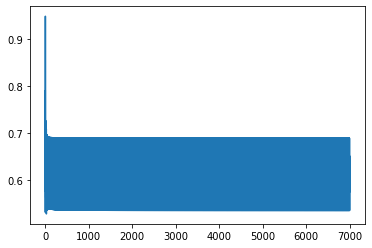

In [335]:
# viewing trend in loss: dropout stops it being monotonic if the cost function is applied without the dropout process
plt.plot(loss_store)

# looks like it would benefit from a decreasing learning rate

In [336]:
# applying to test set (Z matrices are created but not used)
A_1_1, Z_1_1 = feedforward_relu_layer(test_input, W_1_1, B_1_1)
A_1_2, Z_1_2 = feedforward_relu_layer(A_1_1, W_1_2, B_1_2)
A_1_3, Z_1_3 = feedforward_relu_layer(A_1_2, W_1_3, B_1_3)
Z_2 = np.dot(W_2, A_1_3) + B_2
Z_2 = Z_2.astype(np.float) # ensure is float; needed for sigmoid() to work
predictions = sigmoid(Z_2)

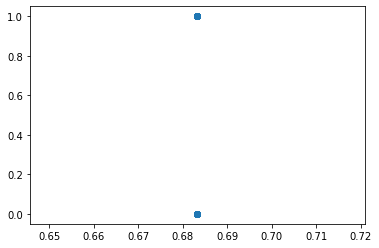

In [337]:
# evaluating accuracy on test set: predictions seem to converge on a single value (overfit) when Adam used
plt.scatter(predictions, test_labs)

In [338]:
predictions     

array([[0.6833206, 0.6833206, 0.6833206, 0.6833206, 0.6833206, 0.6833206,
        0.6833206, 0.6833206, 0.6833206, 0.6833206, 0.6833206, 0.6833206,
        0.6833206, 0.6833206, 0.6833206, 0.6833206, 0.6833206, 0.6833206,
        0.6833206, 0.6833206, 0.6833206, 0.6833206, 0.6833206, 0.6833206,
        0.6833206, 0.6833206, 0.6833206, 0.6833206, 0.6833206, 0.6833206]])